In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import cv2
import numpy as np
import math
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
def prepareImg(img, height):
	"""convert given image to grayscale image (if needed) and resize to desired height"""
	assert img.ndim in (2, 3)
	if img.ndim == 3:
		img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
	h = img.shape[0]
	factor = height / h
	return cv2.resize(img, dsize=None, fx=factor, fy=factor)

In [5]:
def createKernel(kernelSize, sigma, theta):
	"""create anisotropic filter kernel according to given parameters"""
	assert kernelSize % 2 # must be odd size
	halfSize = kernelSize // 2
	
	kernel = np.zeros([kernelSize, kernelSize])
	sigmaX = sigma
	sigmaY = sigma * theta
	
	for i in range(kernelSize):
		for j in range(kernelSize):
			x = i - halfSize
			y = j - halfSize
			
			expTerm = np.exp(-x**2 / (2 * sigmaX) - y**2 / (2 * sigmaY))
			xTerm = (x**2 - sigmaX**2) / (2 * math.pi * sigmaX**5 * sigmaY)
			yTerm = (y**2 - sigmaY**2) / (2 * math.pi * sigmaY**5 * sigmaX)
			
			kernel[i, j] = (xTerm + yTerm) * expTerm

	kernel = kernel / np.sum(kernel)
	return kernel

In [6]:
dir = '/content/drive/My Drive/Colab Notebooks/data/handwriting '
save_dir = '/content/drive/My Drive/Colab Notebooks/data/handwriting /extracted words'

In [7]:
img_data_list = []

In [10]:
#createing kernal/filter
kernel = createKernel(19, 9, 3)

In [ ]:
i = 0
for image in os.listdir(dir):

  #read image
  img = cv2.imread(os.path.join(dir,image))

  #prepare image and convert height
  # imgray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  imgray = prepareImg(img, 2000)
  # plt.figure(figsize = (20,10))
  # plt.imshow(imgray, cmap='gray')

  #apply threshold and filter 
  imgFiltered = cv2.filter2D(imgray, -1, kernel, borderType=cv2.BORDER_REPLICATE).astype(np.uint8)
  ret3,thresh = cv2.threshold(imgFiltered,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
  thresh = 255 - thresh

  # plt.figure(figsize = (20,10))
  # plt.imshow(thresh, cmap='gray')

  # find contours
  (components, _) = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
  res = []
  for c in components:
    # skip small word candidates
    if cv2.contourArea(c) < 350:
      continue
    # append bounding box and image of word to result list
    currBox = cv2.boundingRect(c) # returns (x, y, w, h)
    (x, y, w, h) = currBox
    currImg = img[y:y+h, x:x+w]
    res.append((currBox, currImg))
  res = sorted(res, key=lambda entry:entry[0][0])

  # draw bounding boxes from contours
  for (j, w) in enumerate(res):
    (wordBox, wordImg) = w
    (x, y, w, h) = wordBox
    cv2.imwrite(os.path.join(save_dir,str(i)+".png"), wordImg) # save word
    i +=1
    cv2.rectangle(imgray,(x,y),(x+w,y+h),0,1) # draw bounding box in summary image
  plt.figure(figsize = (30,20))
  plt.imshow(imgray)  
  # break

  #save image data
  img_data_list.append((image,img, imgray, thresh, res))

In [28]:
# below code is for single image
image_dir = '/content/drive/MyDrive/Colab Notebooks/data/handwriting /IMG_20201017_153538.jpg'

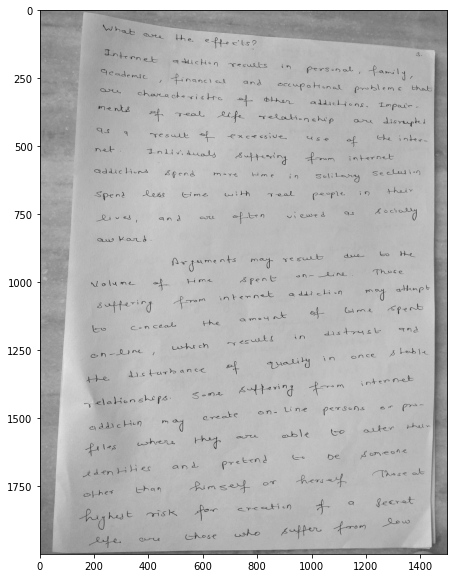

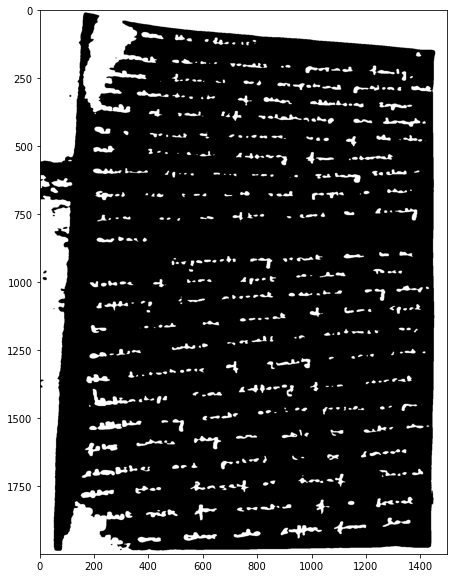

In [29]:
#read image
# img = cv2.imread(os.path.join(dir,image))
img = cv2.imread(image_dir)
 
#prepare image and convert height
imgray = prepareImg(img, 2000)
plt.figure(figsize = (20,10))
plt.imshow(imgray, cmap='gray')

#apply threshold and filter 
imgFiltered = cv2.filter2D(imgray, -1, kernel, borderType=cv2.BORDER_REPLICATE).astype(np.uint8)
ret3,thresh = cv2.threshold(imgFiltered,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
thresh = 255 - thresh

plt.figure(figsize = (20,10))
plt.imshow(thresh, cmap='gray')

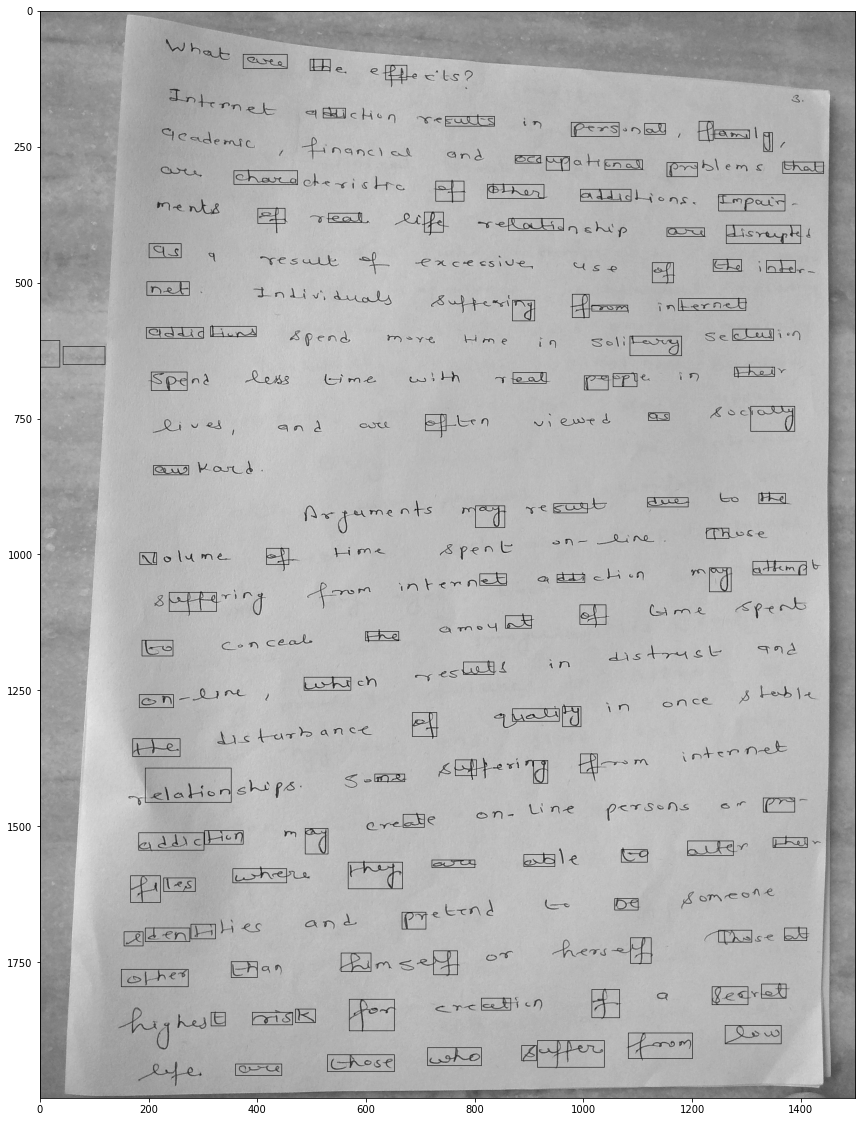

In [34]:
# find contours
(components, _) = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
res = []
for c in components:
  # skip small word candidates
  if cv2.contourArea(c) < 350:
    continue
  # append bounding box and image of word to result list
  currBox = cv2.boundingRect(c) # returns (x, y, w, h)
  (x, y, w, h) = currBox
  currImg = img[y:y+h, x:x+w]
  res.append((currBox, currImg))
res = sorted(res, key=lambda entry:entry[0][0])

# draw bounding boxes from contours
for (j, w) in enumerate(res):
  (wordBox, wordImg) = w
  (x, y, w, h) = wordBox
  # cv2.imwrite(os.path.join(save_dir,str(i)+".png"), wordImg) # save word  
  cv2.rectangle(imgray,(x,y),(x+w,y+h),0,1) # draw bounding box in summary image
plt.figure(figsize = (30,20))
plt.imshow(imgray, cmap='gray')
    

In [35]:
img_data_list.append((img, imgray, thresh, res))